In [1]:
#Cargar librerías.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
#Creamos un data frame para los datos.
df0 = pd.read_csv('vid18_180219.dat', delimiter = ',')
df0.head()

,TIMESTAMP,RECORD,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,...,Result2_Avg,Result3_Avg,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego_mm_Tot,Perco_mm_Tot
0,2018-05-11 20:10:00,7980,12.31,25.87,-5.499501,1.581859,-82.19471,-4.002829,23.26391,296.4139,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
1,2018-05-11 20:20:00,7981,12.30,25.37,-4.934265,1.946161,-80.00718,-1.978131,22.75189,295.9019,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
2,2018-05-11 20:30:00,7982,12.28,24.91,-4.615617,2.407313,-76.72183,-1.868207,22.43361,295.5836,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.46,0.0,0
3,2018-05-11 20:40:00,7983,12.27,24.47,-4.433317,2.523456,-73.10189,-3.367143,22.08901,295.2390,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
4,2018-05-11 20:50:00,7984,12.26,24.09,-2.861873,3.898805,-70.19295,0.915511,22.08449,295.2345,...,0.04,26.4,79.5,0.041,14.70,14.76,15.08,14.46,0.0,0


In [3]:
#Modificamos el datagrame para conservar solo la columna de las fechas y la de las temperaturas promedio.
df0 = pd.DataFrame({"TIME" : df0.TIMESTAMP,"TEMP" : df0.AirTC_Avg})
df0.head()

,TIME,TEMP
0,2018-05-11 20:10:00,23.50
1,2018-05-11 20:20:00,22.96
2,2018-05-11 20:30:00,22.73
3,2018-05-11 20:40:00,22.40
4,2018-05-11 20:50:00,22.46


In [4]:
df0['TIME'] = pd.to_datetime(df0.apply(lambda x: x['TIME'], 1))
df0 = df0[(df0["TIME"] > "2018-11-1")]
df0.head()

,TIME,TEMP
24936,2018-11-01 00:10:00,8.89
24937,2018-11-01 00:20:00,8.66
24938,2018-11-01 00:30:00,8.52
24939,2018-11-01 00:40:00,8.47
24940,2018-11-01 00:50:00,8.58


In [5]:
#Separamos hora, día, mes y año en diferentes columnas.
df0['HORA'] = df0["TIME"].dt.hour
df0['DIA'] = df0["TIME"].dt.day
df0["MES"] = df0["TIME"].dt.month
df0["AÑO"] = df0["TIME"].dt.year
#Se borra la columna TIME
f = len(df0)
df0.index = np.arange(0,f)
df0 = df0.drop(["TIME"], 1)
df0.head()

,TEMP,HORA,DIA,MES,AÑO
0,8.89,0,1,11,2018
1,8.66,0,1,11,2018
2,8.52,0,1,11,2018
3,8.47,0,1,11,2018
4,8.58,0,1,11,2018


In [6]:
#Volvemos a crear un dataframe para organizar los datos.
df = pd.DataFrame({})
df["TEMP"] = df0.groupby(["AÑO","MES","DIA","HORA"])["TEMP"].transform("mean")
#Calculamos las temperaturas mínimas diarias y máximas también.
df["TMIN"] = df0.groupby(["AÑO","MES","DIA"])["TEMP"].transform("min")
df["TMAX"] = df0.groupby(["AÑO","MES","DIA"])["TEMP"].transform("max")
df["HORA"] = df0.HORA
df["DIA"] = df0.DIA
df["MES"] = df0.MES
df["AÑO"] = df0.AÑO
#Borramos las filas duplicadas
df = df.drop_duplicates()
f = len(df)
df.index = np.arange(0,f)
df.head()

,TEMP,TMIN,TMAX,HORA,DIA,MES,AÑO
0,8.624000,6.096,29.58,0,1,11,2018
1,8.493333,6.096,29.58,1,1,11,2018
2,8.690000,6.096,29.58,2,1,11,2018
3,8.846667,6.096,29.58,3,1,11,2018
4,7.397500,6.096,29.58,4,1,11,2018


In [7]:
#Se cálcula el índice UF24.
count = []
for i in range (0,len(df)):
    z = df.TEMP[i]
    if (z <= 1.4) :
        j = 0
    if (z > 1.4 and z <= 2.4) :
        j = 0.5   
    if (z > 2.4 and z <= 9.1) :
        j = 1
    if (z > 9.1 and z <= 12.4) :
        j = 0.5  
    if (z > 12.4 and z <= 15.9) :
        j = 0
    if (z > 15.9 and z <= 18) :
        j = -0.5
    if (z > 18) :
        j = -1
    count.append(j)
df["UF24"] = count

In [8]:
df.head()

,TEMP,TMIN,TMAX,HORA,DIA,MES,AÑO,UF24
0,8.624000,6.096,29.58,0,1,11,2018,1.0
1,8.493333,6.096,29.58,1,1,11,2018,1.0
2,8.690000,6.096,29.58,2,1,11,2018,1.0
3,8.846667,6.096,29.58,3,1,11,2018,1.0
4,7.397500,6.096,29.58,4,1,11,2018,1.0


In [9]:
#Se cálculan los índices HF y HFE.
hf = []
t25 = []
for i in range (0,len(df)):
    z = df.TEMP[i]
    if (z <= 10) :
        j = 1
    if (z > 10) :
        j = 0  
    hf.append(j)
df["HF"] = hf

for i in range (0,len(df)):
    z = df.TEMP[i]
    if (z >= 25) :
        j = 1
    if (z<25) :
        j = 0  
    t25.append(j)
df["T>25"] = t25

df["HFE"] = df["HF"] - df["T>25"]

In [10]:
df.head(15)

,TEMP,TMIN,TMAX,HORA,DIA,MES,AÑO,UF24,HF,T>25,HFE
0,8.624000,6.096,29.58,0,1,11,2018,1.0,1,0,1
1,8.493333,6.096,29.58,1,1,11,2018,1.0,1,0,1
2,8.690000,6.096,29.58,2,1,11,2018,1.0,1,0,1
3,8.846667,6.096,29.58,3,1,11,2018,1.0,1,0,1
4,7.397500,6.096,29.58,4,1,11,2018,1.0,1,0,1
5,7.289833,6.096,29.58,5,1,11,2018,1.0,1,0,1
6,6.806833,6.096,29.58,6,1,11,2018,1.0,1,0,1
7,8.110167,6.096,29.58,7,1,11,2018,1.0,1,0,1
8,14.960000,6.096,29.58,8,1,11,2018,0.0,0,0,0
9,19.710000,6.096,29.58,9,1,11,2018,-1.0,0,0,0


In [11]:
df.tail(15)

,TEMP,TMIN,TMAX,HORA,DIA,MES,AÑO,UF24,HF,T>25,HFE
2608,20.065000,3.259,20.990,17,17,2,2019,-1.0,0,0,0
2609,18.021667,3.259,20.990,18,17,2,2019,-1.0,0,0,0
2610,15.321667,3.259,20.990,19,17,2,2019,0.0,0,0,0
2611,12.143333,3.259,20.990,20,17,2,2019,0.5,0,0,0
2612,10.508333,3.259,20.990,21,17,2,2019,0.5,0,0,0
2613,8.463333,3.259,20.990,22,17,2,2019,1.0,1,0,1
2614,7.385667,3.259,20.990,23,17,2,2019,1.0,1,0,1
2615,6.758167,3.243,7.028,0,18,2,2019,1.0,1,0,1
2616,5.966333,3.243,7.028,1,18,2,2019,1.0,1,0,1
2617,5.617833,3.243,7.028,2,18,2,2019,1.0,1,0,1


<Figure size 1080x1080 with 0 Axes>

<Figure size 432x288 with 0 Axes>

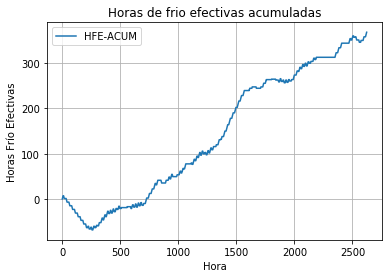

In [12]:
#En la Evaluación 1 ya se sacó la gráfica para las Horas de Frio Acumuladas. Ahora solo se necesita sacar la gráfica de
#Horas de Frio Efectivas Acumuladas.
f = len(df)
df.index = np.arange(0,f)
df.head()
df["HFE-ACUM"] = df["HFE"].cumsum()
df2 = df[["HFE-ACUM"]]
plt.figure(figsize = (15,15))
fig = plt.figure(); df2.plot(); plt.legend(loc = 'best')
plt.title("Horas de frio efectivas acumuladas")
plt.ylabel("Horas Frío Efectivas")
plt.xlabel("Hora")
plt.grid(True)
plt.show()